In [1]:
import random
import numpy as np
import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Dropout

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [2]:
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['image.cmap'] = 'gray'

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
SEED_VALUE = 42
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [6]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_valid = x_train[:10000]
y_valid = y_train[:10000]

In [7]:
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


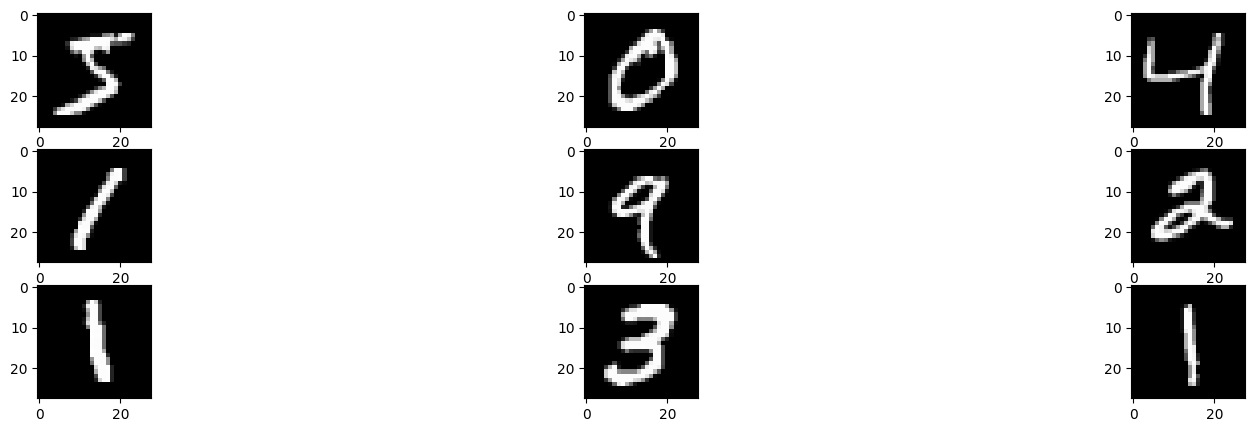

In [9]:
plt.figure(figsize=[20,5])
for i in range(9):
    plt.subplot(3,3,i+1) #1 row 3 columns and iterate number +1
    plt.axis(True)
    plt.imshow(x_train[i],cmap='gray')
    plt.subplots_adjust(wspace=0.2,hspace=0.2)

In [10]:
x_train = x_train.reshape((x_train.shape[0],28*28))
x_train = x_train.astype ("float32") / 255

x_test = x_test.reshape((x_test.shape[0],28*28))
x_test = x_test.astype ("float32") / 255

x_valid = x_valid.reshape((x_valid.shape[0],28*28))
x_valid = x_valid.astype ("float32") / 255

In [11]:
print(x_train.shape)

(60000, 784)


In [12]:
((x_train_fashion,y_train_fashion),(_,_)) = fashion_mnist.load_data()
print(y_train_fashion[0:9])

[9 0 0 3 0 2 7 2 5]


In [13]:
y_train_onehot = to_categorical (y_train_fashion[0:9])
print(y_train_onehot)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [14]:
y_train = to_categorical (y_train)
y_test = to_categorical (y_test)
y_valid = to_categorical (y_valid)

In [15]:
print(y_train.shape)

(60000, 10)


In [16]:
model = tf.keras.Sequential()
model.add(Dense(128,activation='relu', input_shape = (x_train.shape[1],)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

c:\Users\dhika\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_crossentropy']
)

In [18]:
from keras.callbacks import ModelCheckpoint
#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=7)

# Define the checkpoint callback
checkpoint = ModelCheckpoint('best_model.keras', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

# Train the model with the checkpoint callback
training_result = model.fit(x_train,
                            y_train,
                            epochs=42,
                            batch_size=64,
                            validation_data=(x_valid, y_valid),
                            callbacks=[checkpoint])

Epoch 1/42
908/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8744 - categorical_crossentropy: 0.4450 - loss: 0.4450
Epoch 1: val_loss improved from inf to 0.14032, saving model to best_model.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8760 - categorical_crossentropy: 0.4390 - loss: 0.4390 - val_accuracy: 0.9573 - val_categorical_crossentropy: 0.1403 - val_loss: 0.1403
Epoch 2/42
934/938 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9630 - categorical_crossentropy: 0.1230 - loss: 0.1230
Epoch 2: val_loss improved from 0.14032 to 0.07470, saving model to best_model.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9630 - categorical_crossentropy: 0.1229 - loss: 0.1229 - val_accuracy: 0.9758 - val_categorical_crossentropy: 0.0747 - val_loss: 0.0747
Epoch 3/42
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9761 - categorical_crossentropy: 0.0810 - loss: 0.0810
Epoch 3: val_loss improved from 0.07470 to 0.05535, saving model to best_model.keras
938/

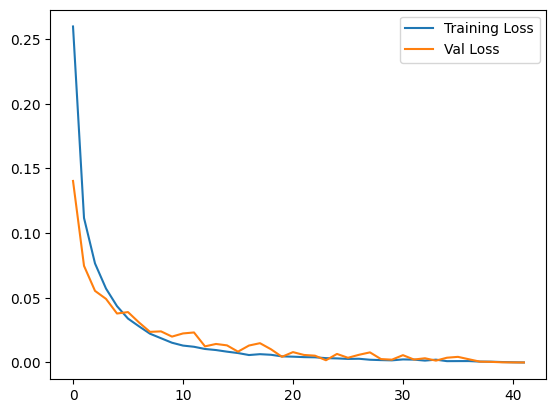

In [19]:
plt.plot(training_result.history['loss'],label='Training Loss')
plt.plot(training_result.history['val_loss'],label='Val Loss')
plt.legend()
plt.show()

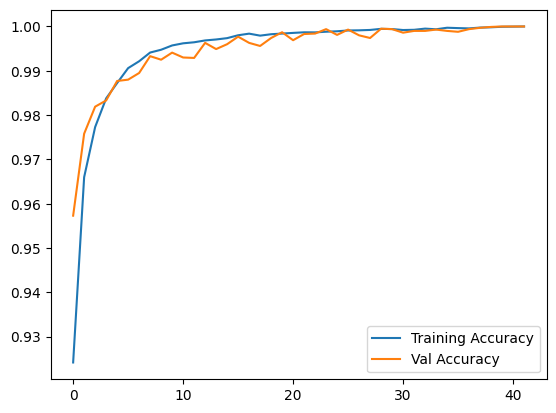

In [20]:
plt.plot(training_result.history['accuracy'],label='Training Accuracy')
plt.plot(training_result.history['val_accuracy'],label='Val Accuracy')
plt.legend()
plt.show()

In [34]:
predictions = model.predict(x_test)
index = 9
print("Ground Truth for Test Digit: ", np.argmax(y_test[index]))
print("\n")
print("Prediction for each class: \n")
predicted_digit = np.argmax(predictions[index])
for i in range(10):
    print("digit: ", i, "probability: ", predictions[index][i])

if predicted_digit == np.argmax(y_test[index]):
    print('Yes, the model can predict correctly')
else:
    print('No, the model cannot predict correctly')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step
Ground Truth for Test Digit:  9


Prediction for each class: 

digit:  0 probability:  2.1555293e-37
digit:  1 probability:  0.0
digit:  2 probability:  0.0
digit:  3 probability:  2.0846129e-26
digit:  4 probability:  2.0195067e-13
digit:  5 probability:  1.5353981e-33
digit:  6 probability:  0.0
digit:  7 probability:  1.253447e-18
digit:  8 probability:  1.0144204e-21
digit:  9 probability:  1.0
Yes, the model can predict correctly


In [35]:
predictions = model.predict(x_test)
predicted_label = [np.argmax(i) for i in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step


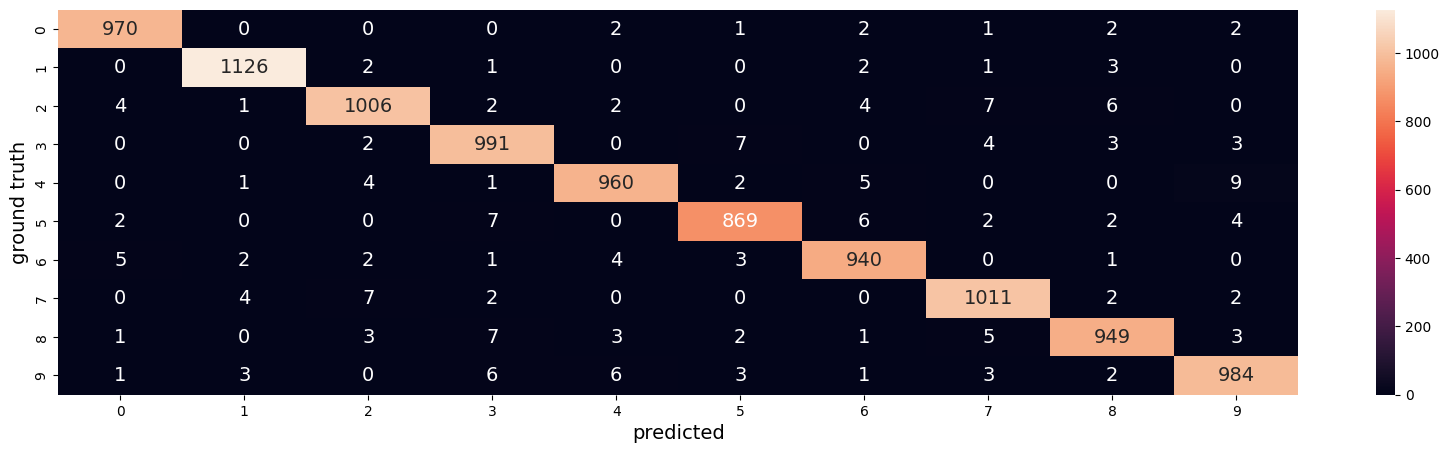

In [36]:
import seaborn as sns
y_test_integer_label = tf.argmax(y_test,axis=1)
cm=tf.math.confusion_matrix(labels=y_test_integer_label,predictions=predicted_label)
plt.figure(figsize=[20,5])
sns.heatmap(cm,annot=True,fmt='d',annot_kws={"size":14})
plt.xlabel("predicted")
plt.ylabel("ground truth")
plt.show()

In [38]:
from PIL import Image
def load_image(image_path):
    img = Image.open(image_path)
    img = img.resize((28, 28))
    img = img.convert('L') 
    img = np.array(img) / 255.0
    img = img.reshape((1, 784))
    return img

def predict_image(image_path):
    img = load_image(image_path)
    prediction = model.predict(img)
    return np.argmax(prediction)

image_path = r"C:\Users\dhika\Downloads\mnist_test.jpg"  
prediction = predict_image(image_path)
print(f'The predicted digit is: {prediction}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
The predicted digit is: 7


In [45]:
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(gray, (28, 28))
    img = img / 255.0
    img = img.reshape((1, 784))
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)
    contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.putText(frame, f'Predicted digit: {predicted_digit}', (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    cv2.imshow('Camera', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━